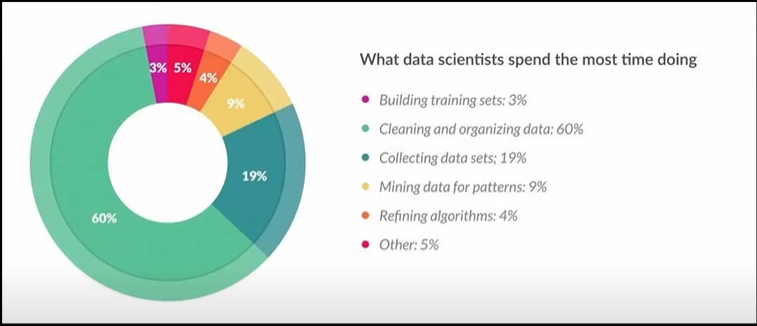

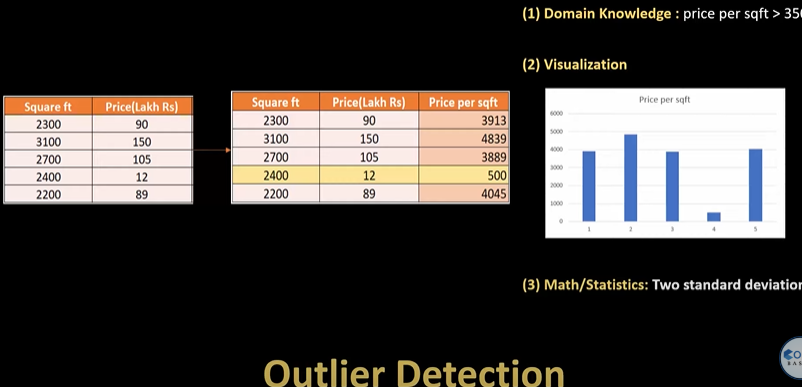

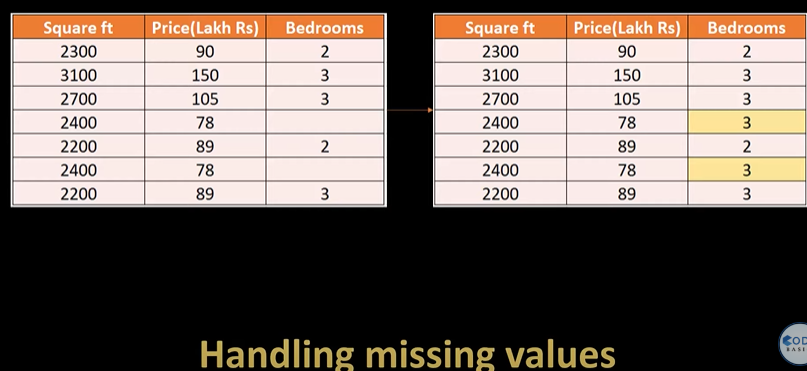

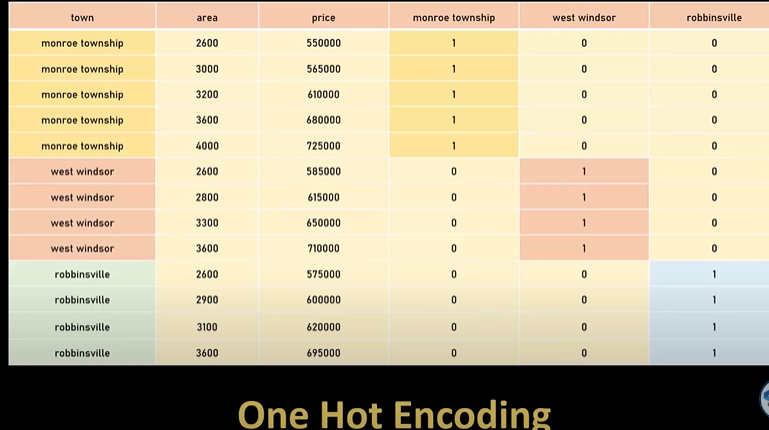

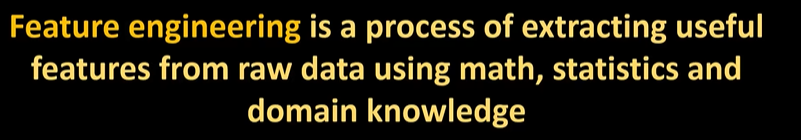

In [1]:
import pandas as pd

# Data for the CSV file
data = {
    "Name": ["John", "Emily", "Michael", "Sarah", "William", "Olivia", "David", "Ava"],
    "Height": [175, 160, 180, 165, 185, 155, 170, 158]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('names_and_heights.csv', index=False)

In [3]:
df = pd.read_csv("height.csv")
df.head()

,Name,Height
0,John,175
1,Emily,160
2,Michael,180
3,Sarah,165
4,William,185



Detect outliers using percentile

In [4]:
max_threshold = df['Height'].quantile(0.95)

In [5]:
max_threshold

np.float64(183.25)

In [6]:
df[df['Height']>max_threshold]

,Name,Height
4,William,185


In [8]:
min_thresold = df['Height'].quantile(0.05)
min_thresold

np.float64(156.05)

In [9]:
df[df['Height']<min_thresold]

,Name,Height
5,Olivia,155


Remove outliers

In [10]:
df[(df['Height']<max_threshold) & (df['Height']>min_thresold)]

,Name,Height
0,John,175
1,Emily,160
2,Michael,180
3,Sarah,165
6,David,170
7,Ava,158


Now lets explore banglore property prices dataset

In [11]:
df = pd.read_csv("house.csv")
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,4000,2.0,25,600000
3,2800,NaN,18,530000
4,3200,4.0,22,620000


In [12]:
df.shape

(10, 4)

In [21]:
df.describe()

,area,bedrooms,age,price
count,10.000000,8.000000,10.000000,10.000000
mean,3300.000000,2.875000,21.300000,584500.000000
std,716.472842,0.834523,4.945256,60389.936616
min,2500.000000,2.000000,15.000000,500000.000000
25%,2725.000000,2.000000,17.250000,535000.000000
50%,3100.000000,3.000000,21.000000,582500.000000
75%,3875.000000,3.250000,24.500000,627500.000000
max,4500.000000,4.000000,29.000000,680000.000000


Explore samples that are above 99.90% percentile and below 1% percentile rank

In [14]:
min_thresold, max_threshold = df.price.quantile([0.001, 0.999])
min_thresold, max_threshold

(500180.0, 679730.0)

In [15]:
df[df.price< min_thresold]

,area,bedrooms,age,price
6,2500,3.0,16,500000


In [17]:
df[df.price > max_threshold]

,area,bedrooms,age,price
8,4500,2.0,29,680000



Remove outliers

In [18]:
df2 = df[(df.price<max_threshold) & (df.price>min_thresold)]
df2.shape

(8, 4)

In [20]:
df2.describe()

,area,bedrooms,age,price
count,8.0,6.000000,8.000000,8.000000
mean,3250.0,3.000000,21.000000,583125.000000
std,600.0,0.894427,4.342481,48619.330371
min,2600.0,2.000000,15.000000,520000.000000
25%,2775.0,2.250000,17.750000,545000.000000
50%,3100.0,3.000000,21.000000,582500.000000
75%,3625.0,3.750000,23.500000,622500.000000
max,4200.0,4.000000,28.000000,650000.000000


In [22]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [23]:
df = pd.read_csv("height.csv")
df.sample(5)

,Name,Height
3,Sarah,165
7,Ava,158
1,Emily,160
4,William,185
0,John,175


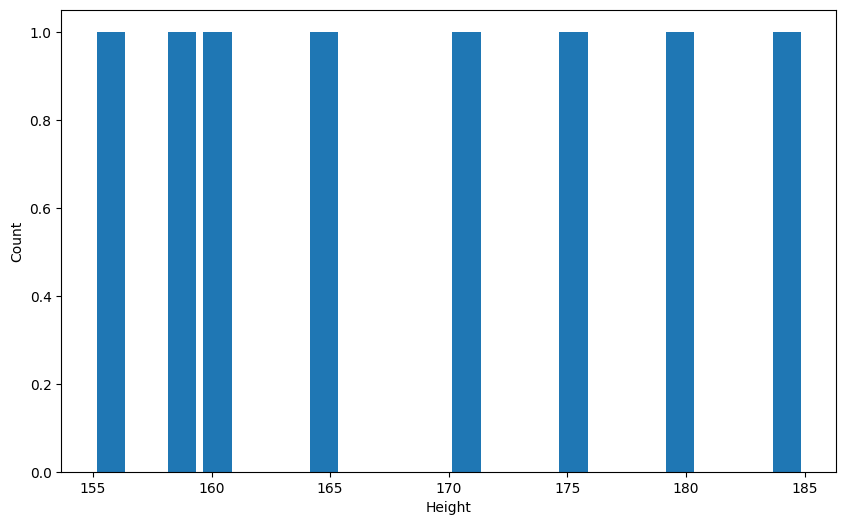

In [26]:
plt.hist(df.Height, bins=20, rwidth=0.8) # bins 20 == no of bar Suppose you have a dataset of exam scores ranging from 0 to 100. With bins=20, the scores would be divided into 20 intervals of 5 points each:
# Bin 1: 0-4
# Bin 2: 5-9
# Bin 3: 10-14
# rwidth=0.8 specifies that the width of each bar or histogram bin should be 80% of the default width.
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

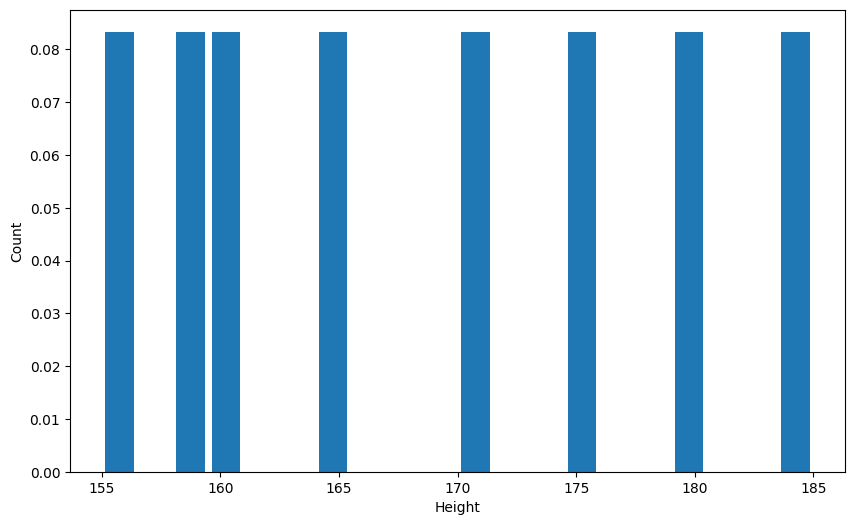

In [29]:
plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height')
plt.ylabel('Count')


In [30]:
from scipy.stats import norm
import numpy as np

In [32]:
rng = np.arange(df.Height.min(), df.Height.max(), 0.1) #[start,] stop, [step,]

In [ ]:
# plt.plot(): Matplotlib function to create a line plot.
# rng: Range of x-values for the plot.
# norm.pdf(): Function from SciPy to calculate the probability density function (PDF) of a normal distribution.
# df.Height.mean(): Mean of the 'Height' column in the DataFrame df.
# df.Height.std(): Standard deviation of the 'Height' column in the DataFrame df.

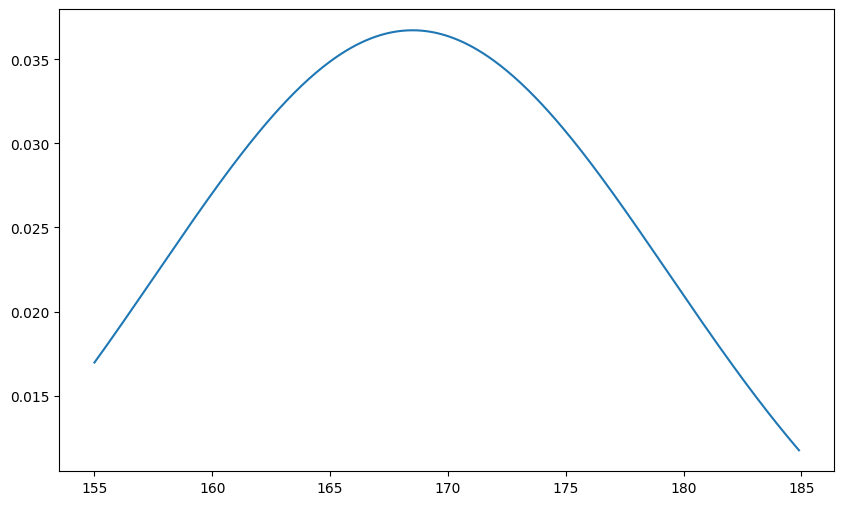

In [34]:
plt.plot(rng, norm.pdf(rng,df.Height.mean(),df.Height.std()))

In [36]:

df.Height.mean()

np.float64(168.5)

In [38]:
df.Height.std()

np.float64(10.862780491200215)

(1) Outlier detection and removal using 3 standard deviation

One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [39]:
upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit

np.float64(201.08834147360065)

In [41]:
lower_limit = df.Height.mean() - 3*df.Height.std()
lower_limit

np.float64(135.91165852639935)


Here are the outliers that are beyond 3 std dev from mean

In [42]:
df[(df.Height > upper_limit) | (df.Height< lower_limit)]

,Name,Height



Above the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers


Now remove these outliers and generate new dataframe

In [44]:

df_no_outlier_std_dev = df[(df.Height<upper_limit) & (df.Height>lower_limit)]

In [45]:
df_no_outlier_std_dev.head()

,Name,Height
0,John,175
1,Emily,160
2,Michael,180
3,Sarah,165
4,William,185


In [46]:

df_no_outlier_std_dev.shape

(8, 2)

In [47]:

df.shape

(8, 2)


(2) Outlier detection and removal using Z Score

Z score is a way to achieve same thing that we did above in part (1)


Z score indicates how many standard deviation away a data point is.


Calculate the Z Score

Sample Variance Formula:
s² = Σ(xi - x̄)² / (n - 1)


In [ ]:
# Population Standard Deviation:
# σ = √[(Σ(xi - μ)²) / N]
# Sample Standard Deviation:
# s = √[(Σ(xi - x̄)²) / (n - 1)]

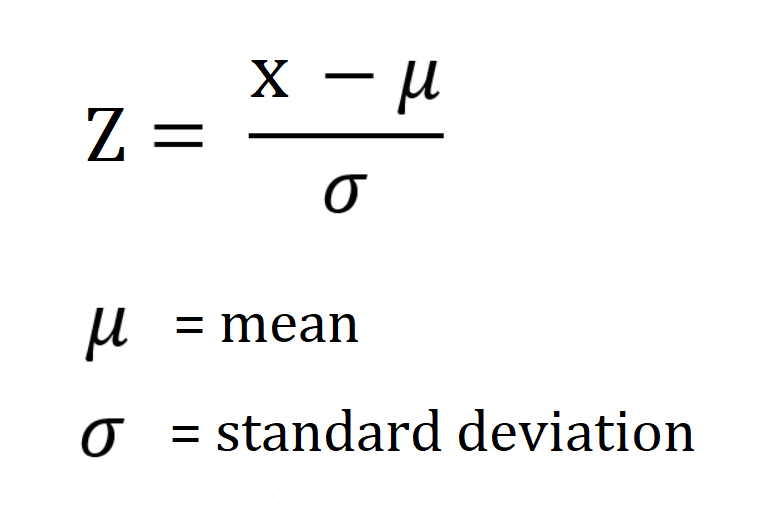

In [ ]:
# Covariance measures the linear relationship between two continuous variables.
# Covariance Formula:
# cov(X, Y) = Σ[(xi - μx)(yi - μy)] / (n - 1)

In [ ]:
# Correlation measures the strength and direction of the linear relationship between two continuous variables.
# earson Correlation Formula:
# r = cov(X, Y) / (std(X) * std(Y))
# Interpretation:
# r = 1: Perfect positive linear relationship
# r = -1: Perfect negative linear relationship
# r = 0: No linear relationship
# 0 < |r| < 1: Weak to strong linear relationship

In [48]:
df['zscore'] = (df.Height - df.Height.mean()) / df.Height.std()
df.head()

,Name,Height,zscore
0,John,175,0.598374
1,Emily,160,-0.782488
2,Michael,180,1.058661
3,Sarah,165,-0.322201
4,William,185,1.518948


In [49]:
df[df['zscore']>3]

,Name,Height,zscore


In [50]:

df[df['zscore']<-3]


,Name,Height,zscore


Here is the list of all outliers

In [51]:
df[(df.zscore<-3) | (df.zscore>3)]

,Name,Height,zscore


Remove the outliers and produce new dataframe

In [52]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,Name,Height,zscore
0,John,175,0.598374
1,Emily,160,-0.782488
2,Michael,180,1.058661
3,Sarah,165,-0.322201
4,William,185,1.518948


In [53]:

df_no_outliers.shape

(8, 3)

In [54]:
df.shape

(8, 3)

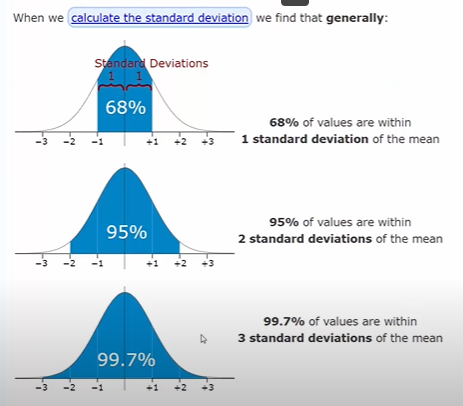

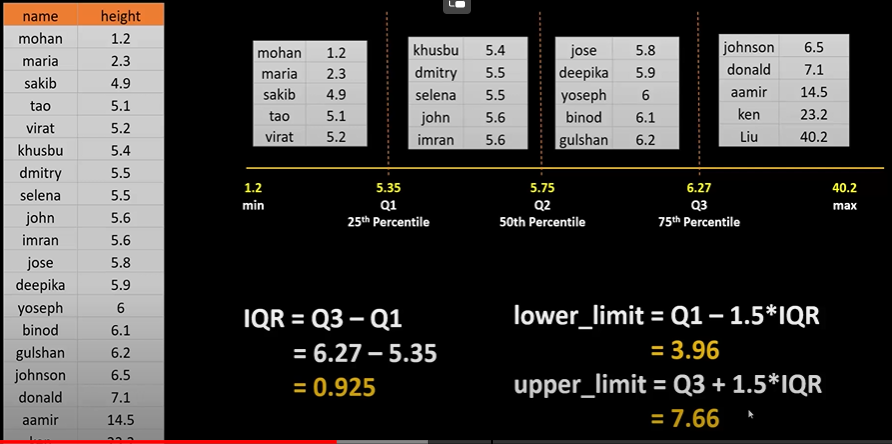

In [55]:
df.describe()

,Height,zscore
count,8.00000,8.000000e+00
mean,168.50000,2.775558e-17
std,10.86278,1.000000e+00
min,155.00000,-1.242776e+00
25%,159.50000,-8.285172e-01
50%,167.50000,-9.205746e-02
75%,176.25000,7.134453e-01
max,185.00000,1.518948e+00


Detect outliers using IQR

In [56]:
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
Q1, Q3

(np.float64(159.5), np.float64(176.25))

In [57]:
IQR = Q3 - Q1
IQR

np.float64(16.75)

In [58]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(np.float64(134.375), np.float64(201.375))

Here are the outliers

In [60]:

df[(df.Height<lower_limit)|(df.Height>upper_limit)]

,Name,Height,zscore


In [62]:
# Remove outliers
df_no_outlier = df[(df.Height>lower_limit)&(df.Height<upper_limit)]
df_no_outlier


,Name,Height,zscore
0,John,175,0.598374
1,Emily,160,-0.782488
2,Michael,180,1.058661
3,Sarah,165,-0.322201
4,William,185,1.518948
5,Olivia,155,-1.242776
6,David,170,0.138086
7,Ava,158,-0.966603
